In [1]:
#importing libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,recall_score,precision_score
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv("bank-full.csv",delimiter=";")

In [3]:
dataset.head().transpose()

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [4]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
dataset.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249AE2CC0C8>,
      dtype=object)

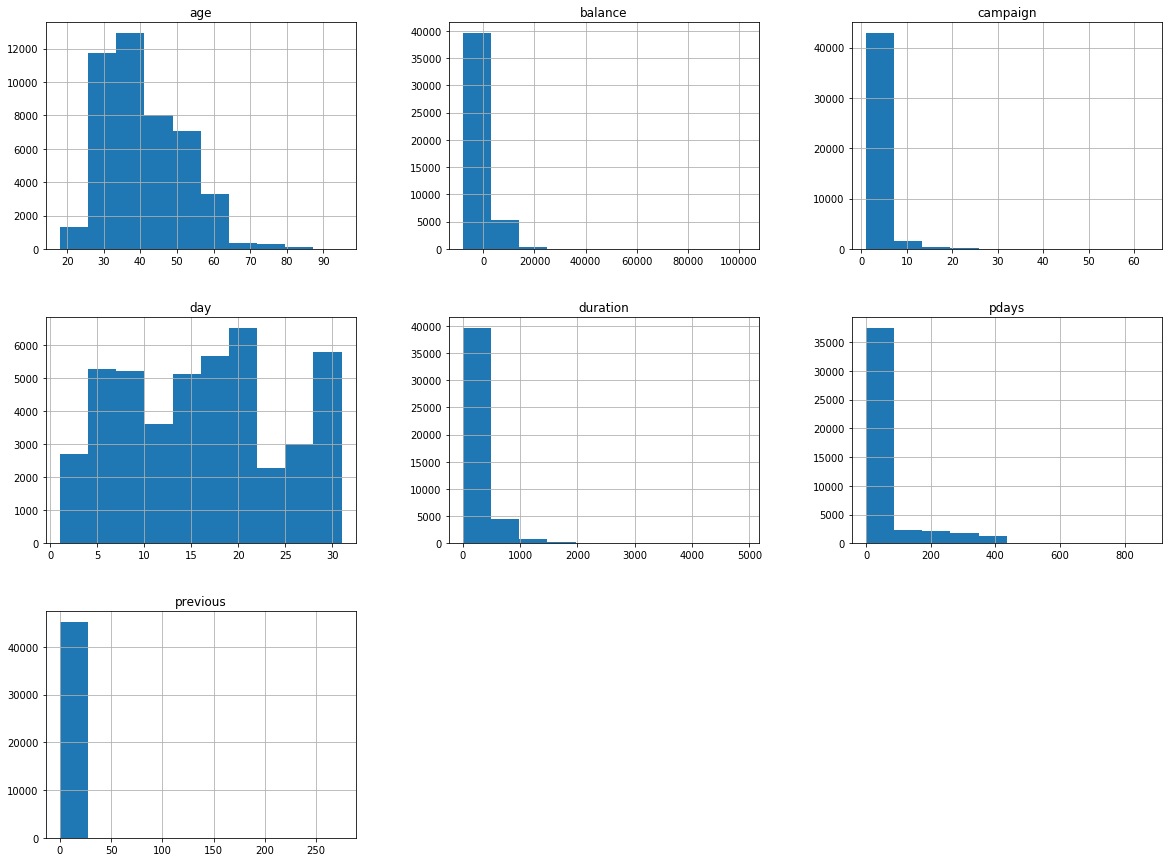

In [7]:
dataset.hist(figsize=(20,15))

In [8]:
dataset["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
dataset["y"]=dataset["y"].map({"yes":1,"no":0})

In [11]:
y=dataset["y"].values

In [12]:
x=dataset.copy()

In [13]:
x=x.drop(["y"],axis=1)

In [14]:
x.head().transpose()

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [15]:
object_attributes=list(x.select_dtypes(["object"]))

In [16]:
object_attributes

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [17]:
value_counts={}
for i in object_attributes:
    value_counts[i]=x[i].value_counts()

In [18]:
value_counts

{'job': blue-collar      9732
 management       9458
 technician       7597
 admin.           5171
 services         4154
 retired          2264
 self-employed    1579
 entrepreneur     1487
 unemployed       1303
 housemaid        1240
 student           938
 unknown           288
 Name: job, dtype: int64,
 'marital': married     27214
 single      12790
 divorced     5207
 Name: marital, dtype: int64,
 'education': secondary    23202
 tertiary     13301
 primary       6851
 unknown       1857
 Name: education, dtype: int64,
 'default': no     44396
 yes      815
 Name: default, dtype: int64,
 'housing': yes    25130
 no     20081
 Name: housing, dtype: int64,
 'loan': no     37967
 yes     7244
 Name: loan, dtype: int64,
 'contact': cellular     29285
 unknown      13020
 telephone     2906
 Name: contact, dtype: int64,
 'month': may    13766
 jul     6895
 aug     6247
 jun     5341
 nov     3970
 apr     2932
 feb     2649
 jan     1403
 oct      738
 sep      579
 mar      477
 de

In [19]:
slices=[len([i for i in y if i==1]),len([i for i in y if i==0])]

Text(0.5, 1.0, 'Distribution of binary classes')

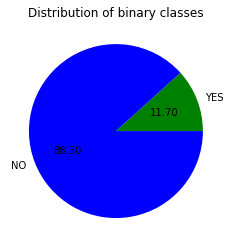

In [20]:
plt.pie(slices,labels=["YES","NO"],colors=["green","blue"],autopct="%.2f")
plt.title("Distribution of binary classes")

In [21]:
from sklearn.preprocessing import LabelBinarizer
def label_encoder(data,objects):
    lb=LabelBinarizer()
    for i in range(len(objects)):
        data[objects[i]]=lb.fit_transform(data[objects[i]])
    return data

In [22]:
x=label_encoder(x,object_attributes)

In [23]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,0,0,0,0,2143,1,0,0,5,0,261,1,-1,0,0
1,44,0,0,0,0,29,1,0,0,5,0,151,1,-1,0,0
2,33,0,0,0,0,2,1,1,0,5,0,76,1,-1,0,0
3,47,0,0,0,0,1506,1,0,0,5,0,92,1,-1,0,0
4,33,0,0,0,0,1,0,0,0,5,0,198,1,-1,0,0


In [24]:
#from sklearn.preprocessing import OneHotEncoder
#ohe=OneHotEncoder()
#for i in range(len(object_attributes)):
 #       x[object_attributes[i]]=ohe.fit_transform(x[object_attributes[i]]).toarray()

In [25]:
scalar=MinMaxScaler()

In [26]:
x=scalar.fit_transform(x)

In [27]:
x

array([[0.51948052, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33766234, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19480519, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.7012987 , 0.        , 0.        , ..., 0.21215596, 0.01090909,
        0.        ],
       [0.50649351, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24675325, 0.        , 0.        , ..., 0.21674312, 0.04      ,
        0.        ]])

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

36168
9043
36168
9043


In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print (accuracy_score(y_test,y_pred_lr))

0.8949463673559659


In [31]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier()
sgdc.fit(x_train,y_train)
y_pred_sgcd=sgdc.predict(x_test)
print (accuracy_score(y_test,y_pred_sgcd))

0.8890854804821409


In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)
print (accuracy_score(y_test,y_pred_rfc))

0.9005860886873825


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print (accuracy_score(y_test,y_pred_knn))

0.8939511224151278


In [34]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=100)
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print(accuracy_score(y_test,y_pred_xgb))

0.9024659957978547


In [35]:
#using cross validation to find the best model for this dataset
score_lr=cross_val_score(lr,x,y,cv=10,scoring="accuracy")
print(score_lr.mean())

C:\Users\akprp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\akprp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.8414091114041398


In [36]:
score_sgcd=cross_val_score(sgdc,x,y,cv=10,scoring="accuracy")
print(score_sgcd.mean())

0.8321414753167706


In [37]:
score_rfc=cross_val_score(rfc,x,y,cv=10,scoring="accuracy")
print(score_rfc.mean())

0.7982772272810915


In [38]:
score_knn=cross_val_score(knn,x,y,cv=10,scoring="accuracy")
print(score_knn.mean())

0.7938313522594104


In [39]:
score_xgb=cross_val_score(xgb,x,y,cv=10,scoring="accuracy")
print(score_xgb.mean())

0.826877079892831


In [40]:
#using grid search for parameter tuning
#knn_neighbors=[i for i in range(1,30)]
#param_grid={"n_neighbors":knn_neighbors}

In [41]:
#grid_knn=GridSearchCV(estimator=knn,param_grid=param_grid,cv=10,scoring="accuracy")
#grid_knn.fit(x,y)

In [42]:
#grid_knn_mean=grid_knn.cv_results_["mean_test_score"]
#plt.plot(knn_neighbors,grid_knn_mean)
#plt.title("evaluation of knn model")
#plt.xlabel("value of n_neighbors")
#plt.ylabel("accuracy of model ")

In [43]:
#print(grid_knn.best_params_)
#print(grid_knn.best_score_)

In [45]:
n_estimators=[i for i in range(50,500,50)]
param_grid_rfc=dict(n_estimators=n_estimators)

In [46]:
grid_rfc=GridSearchCV(estimator=rfc,param_grid=param_grid_rfc,cv=10,scoring="accuracy")
grid_rfc.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False,
                                              rand

Text(0, 0.5, 'mean_accurracy of model')

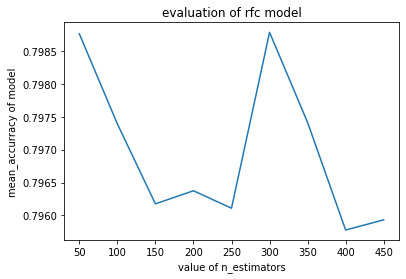

In [47]:
grid_rfc_mean=grid_rfc.cv_results_["mean_test_score"]
plt.plot(n_estimators,grid_rfc_mean)
plt.title("evaluation of rfc model")
plt.xlabel("value of n_estimators")
plt.ylabel("mean_accurracy of model")

In [48]:
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'n_estimators': 300}
0.7987859740690185


In [49]:
rfc=RandomForestClassifier(n_estimators=300)
rfc.fit(x_train,y_train)
y_pred_rfc_300=rfc.predict(x_test)
cm_rfc_300=confusion_matrix(y_test,y_pred_rfc_300)

In [50]:
print(cm_rfc_300)

[[7754  271]
 [ 619  399]]


In [51]:
print(recall_score(y_test,y_pred_rfc_300))
print(precision_score(y_test,y_pred_rfc_300))
print(accuracy_score(y_test,y_pred_rfc_300))

0.3919449901768173
0.5955223880597015
0.9015813336282207


In [52]:
roc_auc_score(y_test,y_pred_rfc_300)

0.6790877598859164

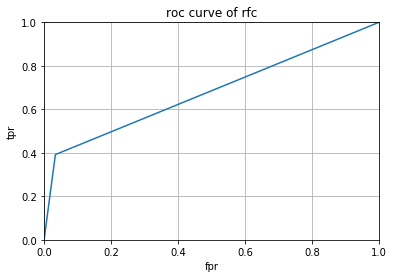

In [54]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,y_pred_rfc_300)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("roc curve of rfc")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.grid(True)